In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import torchvision

from PIL import Image

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

# Read data + augmentation

In [2]:
aug = torchvision.transforms.Compose([
        torchvision.transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
        torchvision.transforms.RandomVerticalFlip(),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.RandomRotation(90)])

In [3]:
class_names = ['rock', 'paper', 'scissors']

def read_dataset(n_aug=3):
    color_transform = np.array([65536, 256, 1])
    X, y = [], []

    for class_id, class_name in enumerate(class_names):
        for filename in os.listdir(f'../data/rockpaperscissors/{class_name}'):
            original_image = Image.open(f'../data/rockpaperscissors/{class_name}/{filename}')
            aug_images = [original_image] + [aug(original_image) for _ in range(n_aug)]

            for image in aug_images:
                X.append(np.array(image).dot(color_transform).flatten())
                y.append(class_id)

    permutation = np.random.permutation(len(y))
    X, y = np.array(X)[permutation], np.array(y)[permutation]
    return X / X.mean(axis=1).reshape(-1,1), y

In [4]:
X, y = read_dataset()

In [5]:
TRAIN_SIZE = int(0.8 * y.shape[0])
X_train, y_train = X[:TRAIN_SIZE], y[:TRAIN_SIZE]
X_test, y_test = X[TRAIN_SIZE:], y[TRAIN_SIZE:]

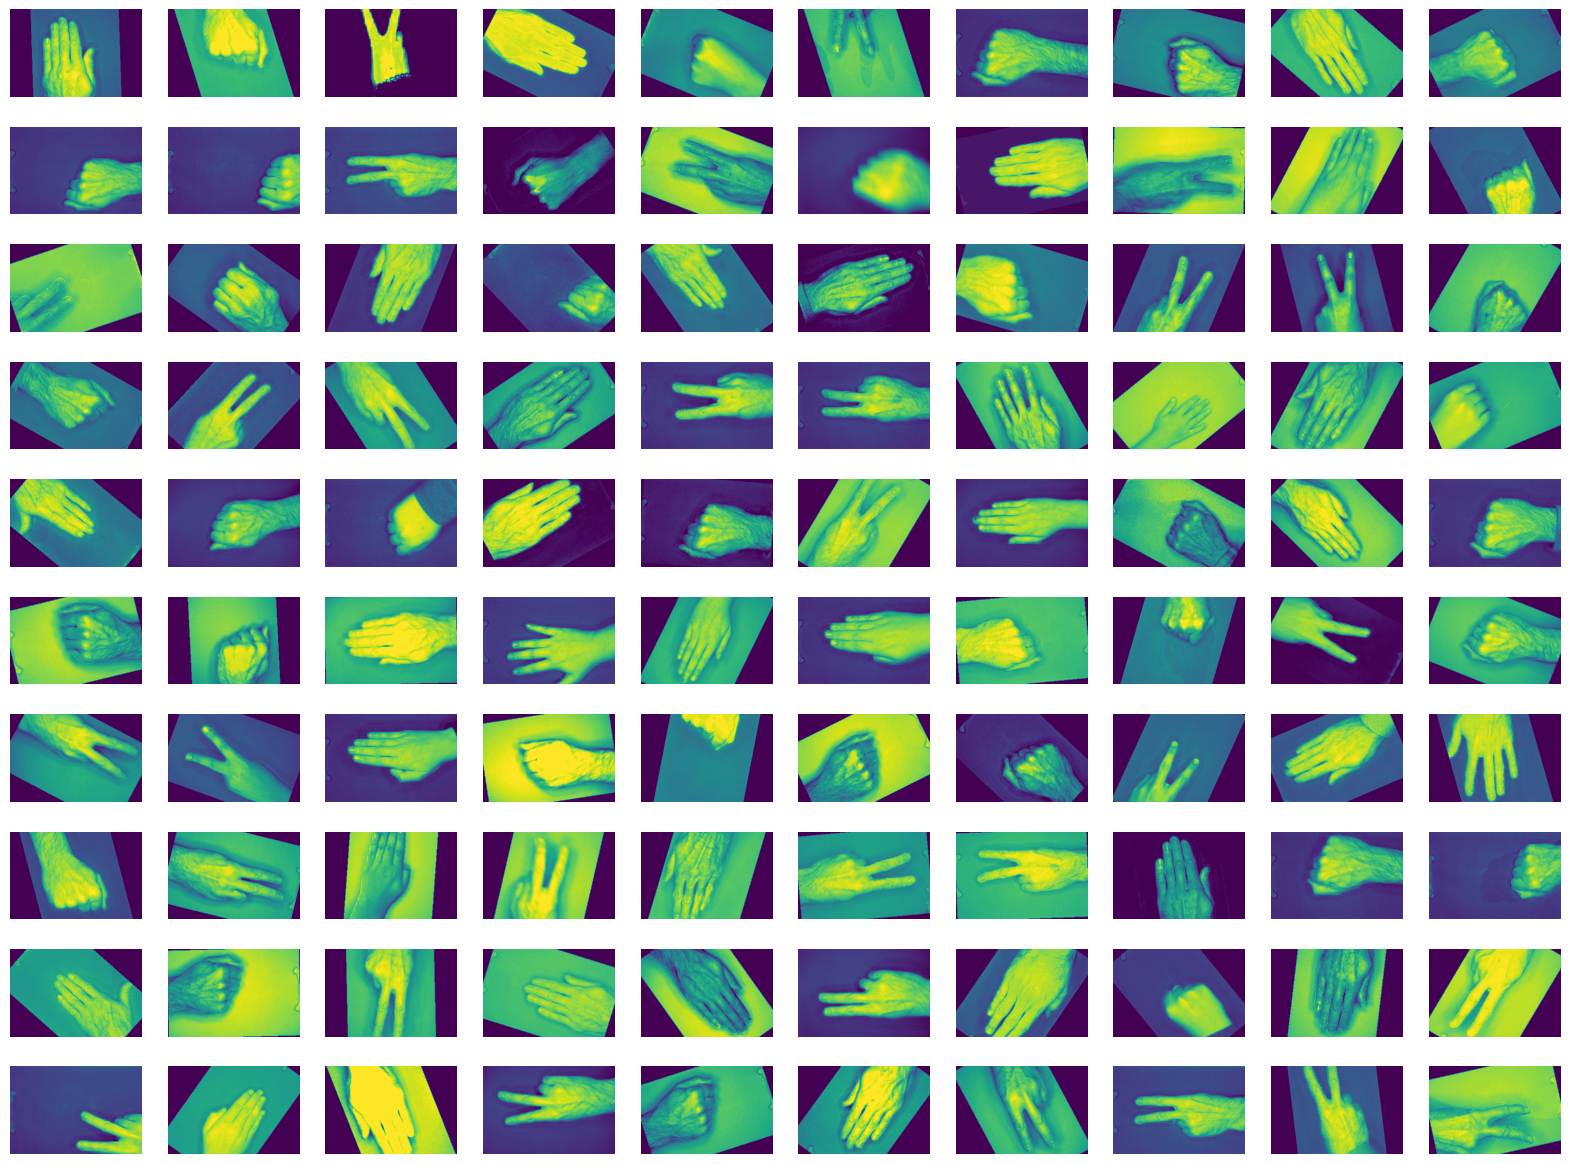

In [6]:
N, M = 10, 10
fig, ax = plt.subplots(N, M, figsize=(20, 15))
for i in range(N):
    for j in range(M):
        ax[i,j].imshow(X[np.random.choice(y.size)].reshape(200, 300))
        ax[i,j].axis('off')
plt.show()

# Feature extraction (dimension reduction)

### PCA

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca_model = PCA(n_components=300)
X_pca = pca_model.fit_transform(X)

In [9]:
X_pca_train = X_pca[:TRAIN_SIZE]
X_pca_test = X_pca[TRAIN_SIZE:]

### CNN ???

# Classification

### Decision Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

##### Original data

In [11]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
decision_tree_classifier.score(X_test, y_test)

0.6276413478012565

##### PCA transformed data

In [12]:
decision_tree_classifier_pca = DecisionTreeClassifier()
decision_tree_classifier_pca.fit(X_pca_train, y_train)
decision_tree_classifier_pca.score(X_pca_test, y_test)

0.5733866362078812

# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

##### Original data

In [14]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1)
random_forest_classifier.fit(X_train, y_train)
random_forest_classifier.score(X_test, y_test)

0.834380354083381

##### PCA tranformed data

In [15]:
random_forest_classifier_pca = RandomForestClassifier(n_estimators=100, n_jobs=-1)
random_forest_classifier_pca.fit(X_pca_train, y_train)
random_forest_classifier_pca.score(X_pca_test, y_test)

0.741290691033695

### Test saving model

In [16]:
import pickle

In [17]:
# save model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_classifier_pca, file)

In [18]:
# read model
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [19]:
loaded_model.score(X_pca_test, y_test)

0.741290691033695

### XGBoost

In [20]:
from xgboost import XGBClassifier

In [22]:
xgb = XGBClassifier(n_estimators=1000, max_depth=15)
xgb.fit(X_pca_train, y_train)
xgb.score(X_pca_test, y_test)

0.8326670474014849